In [2]:
#Imports
import pandas as pd
import numpy as np
import missingno as msno

#pd.set_option('display.max_rows', None)
import warnings 
warnings.filterwarnings("ignore")

## Background:

The problem revolves around predicting the house prices in Ames, Iowa, based on various features provided in the dataset. The goal is to develop a regression model that accurately estimates the sale price of a house using the available information.

The Ames, Iowa dataset obtained from Kaggle contains a comprehensive set of features related to residential properties, including information about the physical attributes, location, and other relevant characteristics. By analyzing these features and their relationships with the sale prices, the aim is to build a predictive model that can assist in determining the approximate value of a house in the Ames area.

The challenge lies in identifying the most influential features that significantly impact the house prices and constructing a robust regression model that can effectively capture the underlying patterns and variations in the data. Additionally, addressing potential issues such as missing values, outliers, and categorical variables requires careful preprocessing and feature engineering to ensure accurate predictions.

Ultimately, the developed model should be capable of accurately estimating the sale price of a house in Ames, Iowa, based on the given set of features, enabling individuals and real estate professionals to make informed decisions regarding property transactions in the area.

In [3]:
#Reading the datasets
df = pd.read_csv("../datasets/train.csv")
df_test = pd.read_csv("../datasets/test.csv")
print(df.head())

    Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
0  109  533352170           60        RL           NaN     13517   Pave   NaN   
1  544  531379050           60        RL          43.0     11492   Pave   NaN   
2  153  535304180           20        RL          68.0      7922   Pave   NaN   
3  318  916386060           60        RL          73.0      9802   Pave   NaN   
4  255  906425045           50        RL          82.0     14235   Pave   NaN   

  Lot Shape Land Contour  ... Screen Porch Pool Area Pool QC Fence  \
0       IR1          Lvl  ...            0         0     NaN   NaN   
1       IR1          Lvl  ...            0         0     NaN   NaN   
2       Reg          Lvl  ...            0         0     NaN   NaN   
3       Reg          Lvl  ...            0         0     NaN   NaN   
4       IR1          Lvl  ...            0         0     NaN   NaN   

  Misc Feature Misc Val Mo Sold Yr Sold  Sale Type  SalePrice  
0          NaN        0     

In [4]:
#Checking rows and columns in the dataset
df.shape

(2051, 81)

In [5]:
#Checking data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

### Total Rows: 2051, Total Columns: 80

In [6]:
#Checking Missing values percentage
((df.isnull().sum())/2051) * 100

Id               0.000000
PID              0.000000
MS SubClass      0.000000
MS Zoning        0.000000
Lot Frontage    16.089712
                  ...    
Misc Val         0.000000
Mo Sold          0.000000
Yr Sold          0.000000
Sale Type        0.000000
SalePrice        0.000000
Length: 81, dtype: float64

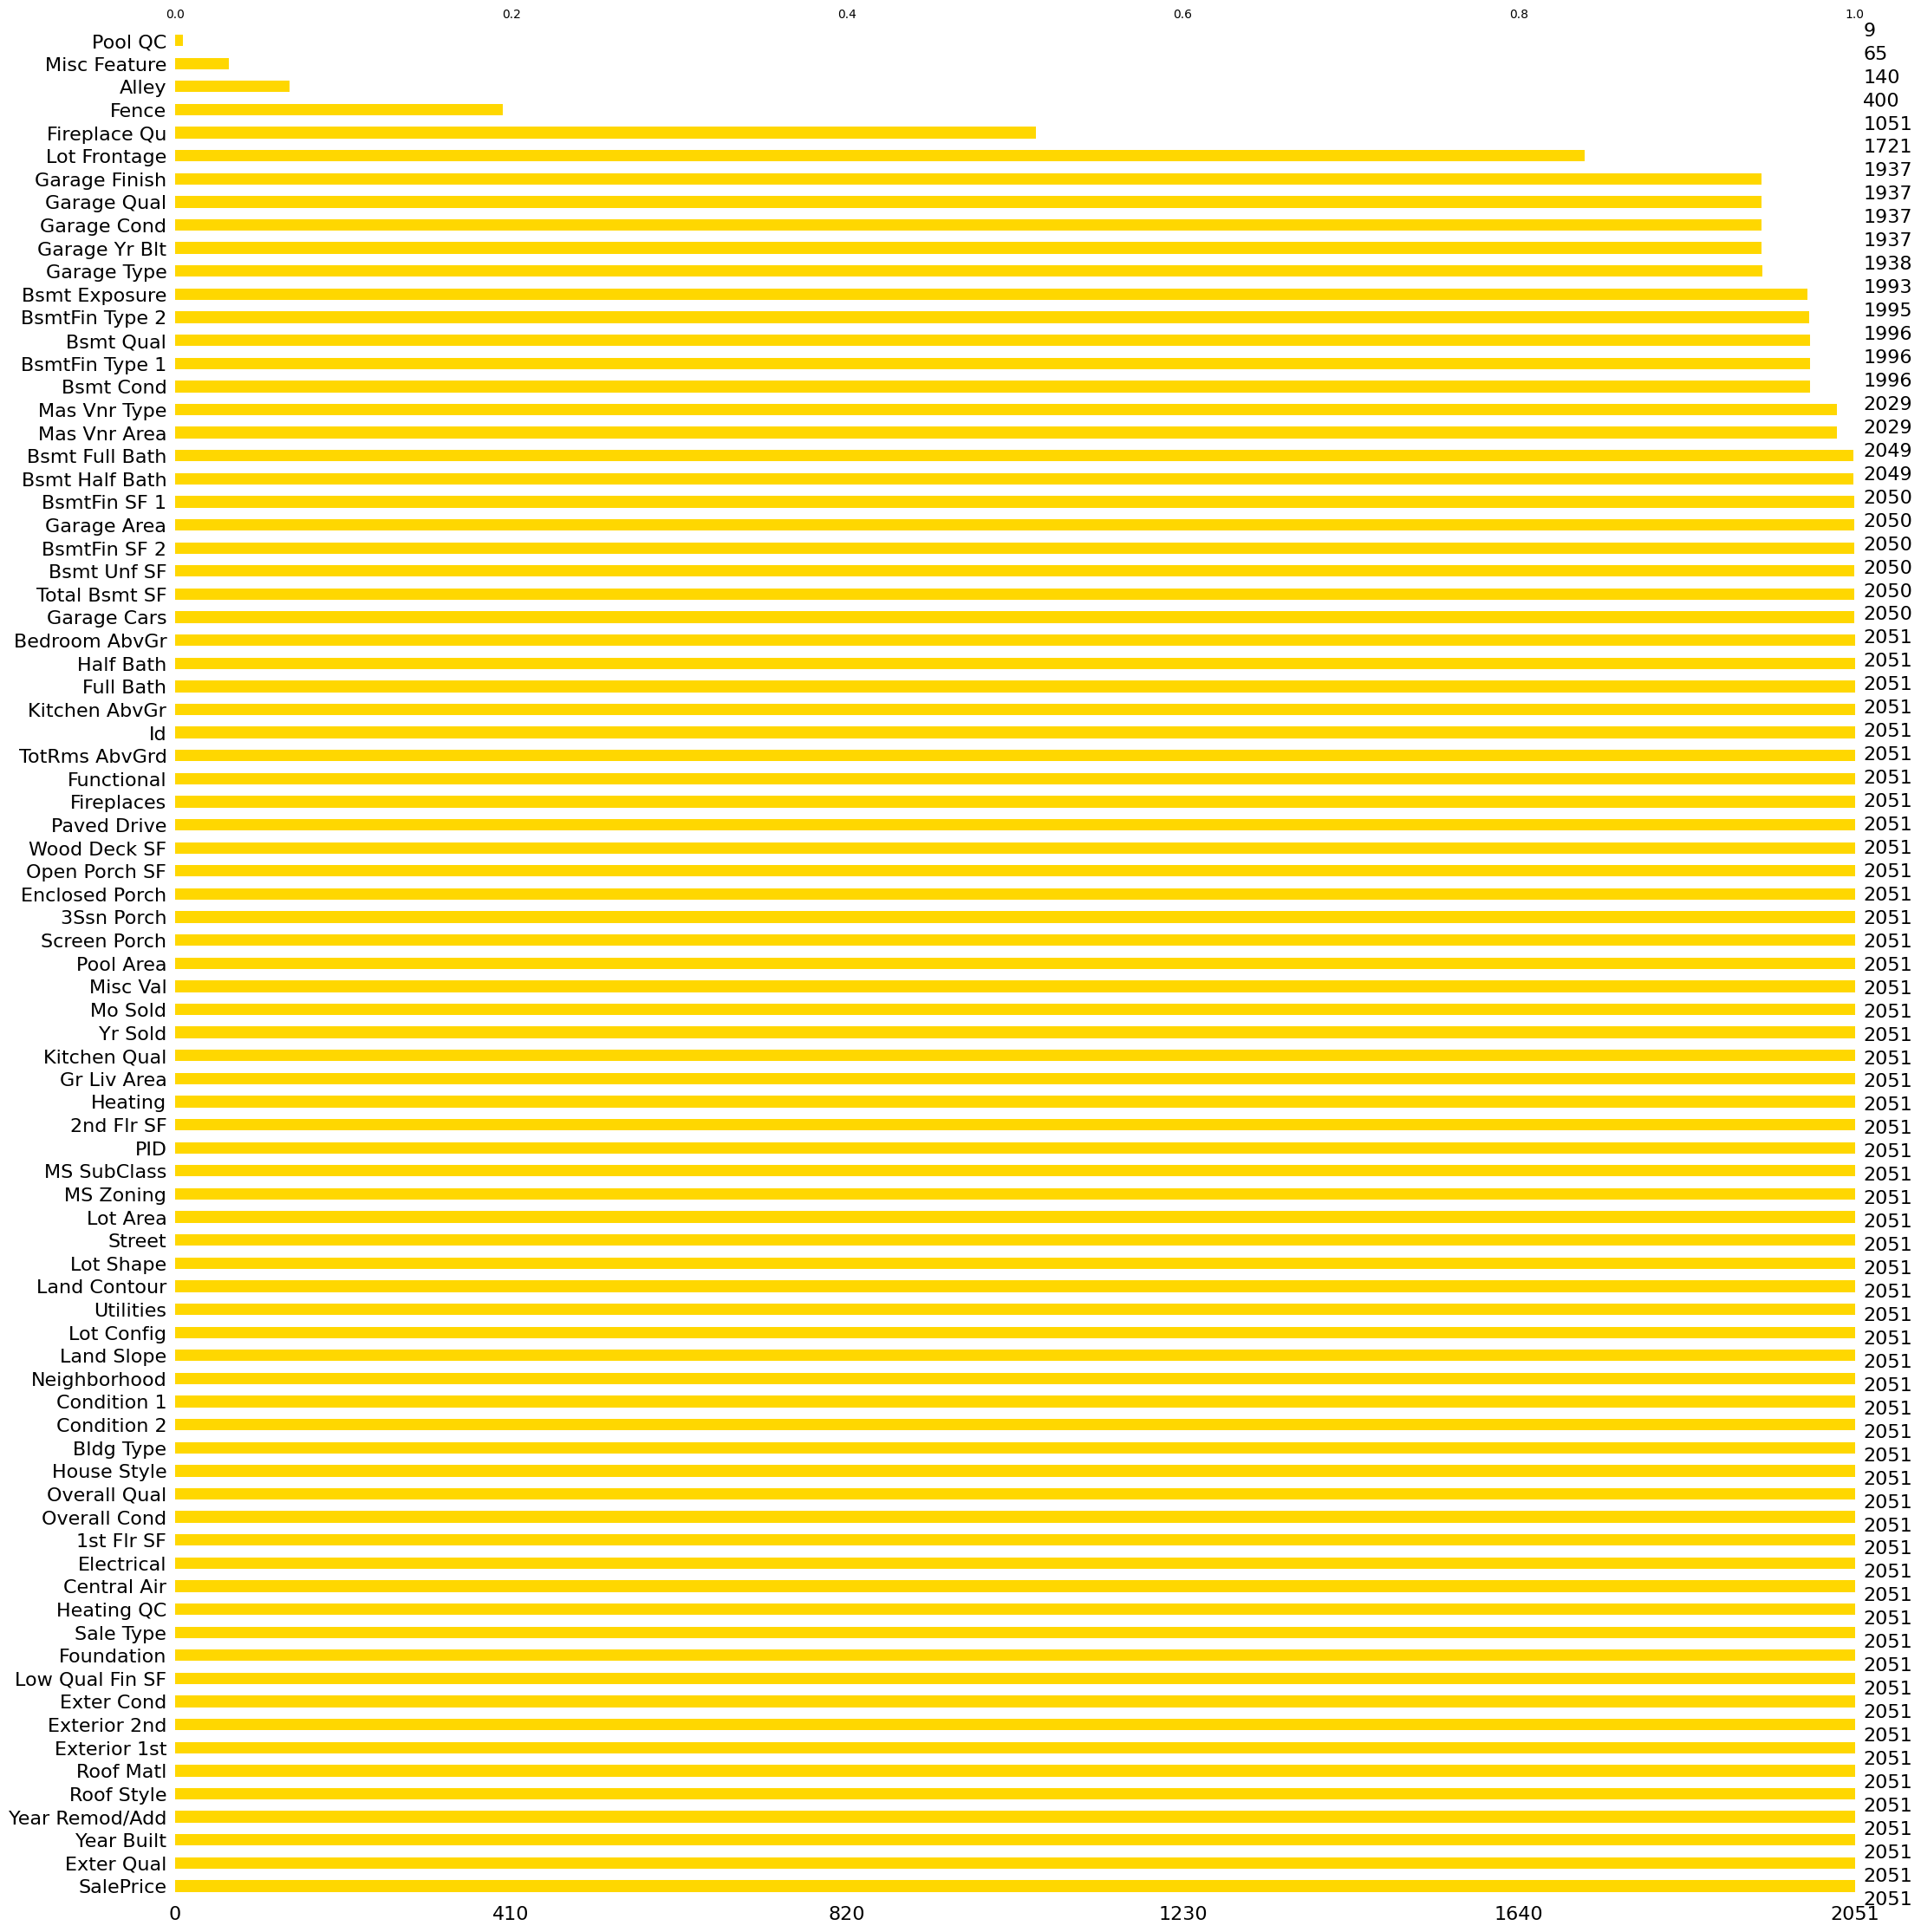

In [22]:
msno.bar(df, color = 'gold', sort = 'descending');

In [7]:
# Converting column names to lower case and snake case
df.columns = df.columns.str.lower().str.replace(" ", "_")
df.head(2)

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000


In [8]:
#Changing case of columns in test data
df_test.columns = df_test.columns.str.lower().str.replace(" ", "_")

### Misc_feature, fence, pool_qc, fireplace_qu, alley columns have 48% or more missing values, dropping those columns

In [9]:
df.drop(columns = ['pool_qc', 'misc_feature', 'fence',
                  'fireplace_qu', 'alley'], inplace = True)
((df.isnull().sum())/2051) * 100

id               0.000000
pid              0.000000
ms_subclass      0.000000
ms_zoning        0.000000
lot_frontage    16.089712
                  ...    
misc_val         0.000000
mo_sold          0.000000
yr_sold          0.000000
sale_type        0.000000
saleprice        0.000000
Length: 76, dtype: float64

In [9]:
#Dropping Missing Values from Test Data
df_test.drop(columns = ['pool_qc', 'misc_feature', 'fence','fireplace_qu', 'alley'], inplace = True)

In [10]:
# Examining the lot_frontage variable that has 16% missing values
df['lot_frontage'].corr(df['saleprice'])

0.3418424837268712

In [11]:
df['lot_frontage'].describe()

count    1721.000000
mean       69.055200
std        23.260653
min        21.000000
25%        58.000000
50%        68.000000
75%        80.000000
max       313.000000
Name: lot_frontage, dtype: float64

In [12]:
df['lot_frontage'].isnull().sum()

330

In [13]:
df['lot_frontage'].median()

68.0

In [14]:
#mean and median are similar, replacing with median as it has no 
#decimal
df['lot_frontage'].fillna(df['lot_frontage'].median(), inplace = True)
df['lot_frontage'].isnull().sum()

0

In [15]:
#Replacing all the missing values with interpolate method for num vars
df1 = df.interpolate(method = 'linear', limit_direction = 'forward')

- interpolate with linear method ignores the index and treats the variables as equally spaced

In [16]:
#separating data with categorical and numeric vars
cat_data = df.select_dtypes('object')
cat_data.head()

,ms_zoning,street,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,...,central_air,electrical,kitchen_qual,functional,garage_type,garage_finish,garage_qual,garage_cond,paved_drive,sale_type
0,RL,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,...,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD
1,RL,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,...,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD
2,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,Y,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD
3,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,...,Y,SBrkr,TA,Typ,BuiltIn,Fin,TA,TA,Y,WD
4,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,...,Y,SBrkr,TA,Typ,Detchd,Unf,TA,TA,N,WD


In [17]:
cat_data.isnull().sum()

ms_zoning           0
street              0
lot_shape           0
land_contour        0
utilities           0
lot_config          0
land_slope          0
neighborhood        0
condition_1         0
condition_2         0
bldg_type           0
house_style         0
roof_style          0
roof_matl           0
exterior_1st        0
exterior_2nd        0
mas_vnr_type       22
exter_qual          0
exter_cond          0
foundation          0
bsmt_qual          55
bsmt_cond          55
bsmt_exposure      58
bsmtfin_type_1     55
bsmtfin_type_2     56
heating             0
heating_qc          0
central_air         0
electrical          0
kitchen_qual        0
functional          0
garage_type       113
garage_finish     114
garage_qual       114
garage_cond       114
paved_drive         0
sale_type           0
dtype: int64

In [18]:
num_data = df1.select_dtypes('number').drop(columns = 
                                            ['id', 'pid'], axis = 1)
num_data.head()

,ms_subclass,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,bsmtfin_sf_1,bsmtfin_sf_2,...,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,saleprice
0,60,68.0,13517,6,8,1976,2005,289.0,533.0,0.0,...,0,44,0,0,0,0,0,3,2010,130500
1,60,43.0,11492,7,5,1996,1997,132.0,637.0,0.0,...,0,74,0,0,0,0,0,4,2009,220000
2,20,68.0,7922,5,7,1953,2007,0.0,731.0,0.0,...,0,52,0,0,0,0,0,1,2010,109000
3,60,73.0,9802,5,5,2006,2007,0.0,0.0,0.0,...,100,0,0,0,0,0,0,4,2010,174000
4,50,82.0,14235,6,8,1900,1993,0.0,0.0,0.0,...,0,59,0,0,0,0,0,3,2010,138500


In [19]:
#Replacing missing values with most frequently occuring type None
cat_data['mas_vnr_type'].fillna('None', inplace = True)

In [20]:
cat_data['mas_vnr_type'].value_counts()

None       1240
BrkFace     630
Stone       168
BrkCmn       13
Name: mas_vnr_type, dtype: int64

In [21]:
cat_data['bsmt_qual'].value_counts()

TA    887
Gd    864
Ex    184
Fa     60
Po      1
Name: bsmt_qual, dtype: int64

In [22]:
#Replacing missing values with 'TA'
cat_data['bsmt_qual'].fillna("TA", inplace = True)

In [23]:
cat_data['bsmt_qual'].value_counts()

TA    942
Gd    864
Ex    184
Fa     60
Po      1
Name: bsmt_qual, dtype: int64

In [24]:
#Replacing missing values with frequently occuring "TA"
cat_data['bsmt_cond'].fillna('TA', inplace = True)

In [25]:
cat_data['bsmt_cond'].value_counts()

TA    1889
Gd      89
Fa      65
Po       5
Ex       3
Name: bsmt_cond, dtype: int64

In [26]:
#Replacing missing values with frequently occuring "No"
cat_data['bsmt_exposure'].fillna('No', inplace = True)

In [27]:
#Replacing missing values with frequently occuring "GLQ"
cat_data['bsmtfin_type_1'].fillna("GLQ", inplace = True)

In [28]:
#Replacing missing values with frequently occuring "Unf"
cat_data['bsmtfin_type_2'].fillna('Unf', inplace = True)

In [29]:
#Replacing missing values with frequently occuring "Attchd"
cat_data['garage_type'].fillna('"Attchd"', inplace = True)

In [30]:
#Replacing missing values with frequently occuring "Unf"
cat_data['garage_finish'].fillna("Unf", inplace = True)

In [31]:
#Replacing missing values with frequently occuring "TA"
cat_data['garage_qual'].fillna("TA", inplace = True)

In [32]:
#Replacing missing values with frequently occuring "TA"
cat_data['garage_cond'].fillna("TA", inplace = True)

In [33]:
cat_data.isnull().sum()

ms_zoning         0
street            0
lot_shape         0
land_contour      0
utilities         0
lot_config        0
land_slope        0
neighborhood      0
condition_1       0
condition_2       0
bldg_type         0
house_style       0
roof_style        0
roof_matl         0
exterior_1st      0
exterior_2nd      0
mas_vnr_type      0
exter_qual        0
exter_cond        0
foundation        0
bsmt_qual         0
bsmt_cond         0
bsmt_exposure     0
bsmtfin_type_1    0
bsmtfin_type_2    0
heating           0
heating_qc        0
central_air       0
electrical        0
kitchen_qual      0
functional        0
garage_type       0
garage_finish     0
garage_qual       0
garage_cond       0
paved_drive       0
sale_type         0
dtype: int64

In [34]:
no_missing_df = pd.concat([df[['id', 'pid']],num_data, cat_data], axis = 1)
no_missing_df.head(2)

,id,pid,ms_subclass,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,...,central_air,electrical,kitchen_qual,functional,garage_type,garage_finish,garage_qual,garage_cond,paved_drive,sale_type
0,109,533352170,60,68.0,13517,6,8,1976,2005,289.0,...,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD
1,544,531379050,60,43.0,11492,7,5,1996,1997,132.0,...,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD


In [35]:
#Missing data in test numerical data
df_test.select_dtypes('number').isnull().sum()

id                   0
pid                  0
ms_subclass          0
lot_frontage       160
lot_area             0
overall_qual         0
overall_cond         0
year_built           0
year_remod/add       0
mas_vnr_area         1
bsmtfin_sf_1         0
bsmtfin_sf_2         0
bsmt_unf_sf          0
total_bsmt_sf        0
1st_flr_sf           0
2nd_flr_sf           0
low_qual_fin_sf      0
gr_liv_area          0
bsmt_full_bath       0
bsmt_half_bath       0
full_bath            0
half_bath            0
bedroom_abvgr        0
kitchen_abvgr        0
totrms_abvgrd        0
fireplaces           0
garage_yr_blt       45
garage_cars          0
garage_area          0
wood_deck_sf         0
open_porch_sf        0
enclosed_porch       0
3ssn_porch           0
screen_porch         0
pool_area            0
misc_val             0
mo_sold              0
yr_sold              0
dtype: int64

In [36]:
df['lot_frontage'].median()

68.0

In [37]:
#Replacing null values in test data with median train data to avoid 
#data leakage
df_test['lot_frontage'].fillna(68, inplace = True)

In [38]:
df['mas_vnr_area'].mean()

99.69590931493346

In [39]:
#replacing missing values in test data with mean train data
df_test['mas_vnr_area'].fillna(df['mas_vnr_area'].mean, inplace = True)

In [40]:
df_test.select_dtypes('object').isnull().sum().tail()

garage_finish    45
garage_qual      45
garage_cond      45
paved_drive       0
sale_type         0
dtype: int64

In [41]:
cat_data['mas_vnr_type'].value_counts()

None       1240
BrkFace     630
Stone       168
BrkCmn       13
Name: mas_vnr_type, dtype: int64

In [42]:
#Replacing missing values in test with frequent values from train data
df_test['garage_type'].fillna("Attchd", inplace = True)

In [43]:
df_test['garage_finish'].fillna("Unf", inplace = True)

In [44]:
df_test['garage_qual'].fillna("TA", inplace = True)

In [45]:
df_test['garage_cond'].fillna("TA", inplace = True)

In [46]:
df_test['bsmt_qual'].fillna("TA", inplace = True)

In [47]:
df_test['bsmt_cond'].fillna("TA", inplace = True)

In [48]:
df_test['bsmt_exposure'].fillna("No", inplace = True)

In [49]:
df_test['bsmtfin_type_1'].fillna("GLQ", inplace = True)

In [50]:
df_test['bsmtfin_type_2'].fillna("Unf", inplace = True)

In [51]:
df_test['mas_vnr_type'].fillna("None", inplace = True)

In [52]:
df_test['kitchen_qual'] = np.where(df_test['kitchen_qual'] == 
                                   'Po', 'TA', df_test['kitchen_qual'])

In [53]:
df_test.isnull().sum()

id              0
pid             0
ms_subclass     0
ms_zoning       0
lot_frontage    0
               ..
pool_area       0
misc_val        0
mo_sold         0
yr_sold         0
sale_type       0
Length: 75, dtype: int64

In [55]:
no_missing_df.to_csv('../datasets/cleaned.csv')

In [56]:
#Writing the Data to csv to use this for data exploration
df_test.to_csv('../datasets/cleaned_test.csv')